# IPL Dataset Analysis

## Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df_matches = pd.read_csv("/content/drive/MyDrive/PrepInsta_Wokerd/week 6/IPL/matches.csv",index_col="id")
df_matches.head()

,Unnamed: 0,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,,
1,0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
df_deliveries = pd.read_csv("/content/drive/MyDrive/PrepInsta_Wokerd/week 6/IPL/deliveries.csv")
df_deliveries.head()

,Unnamed: 0,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## **matches.csv**

## Basic Data Exploration

In [14]:
df_matches.shape

(636, 18)

In [15]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 1 to 636
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

## Data Cleaning

In [16]:
df_matches.isnull().sum()

Unnamed: 0           0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [17]:
df_matches["umpire1"].fillna("Unknown", inplace=True)
df_matches["umpire2"].fillna("Unknown", inplace=True)
df_matches.drop(columns=["umpire3"], inplace=True)
df_matches.dropna(subset=["winner", "player_of_match"], inplace=True)
df_matches["city"].fillna("Unknown", inplace=True)

In [18]:
df_matches.isnull().sum()

Unnamed: 0         0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [19]:
df_matches.drop(columns=["Unnamed: 0"],inplace=True)

## Univariate Analysis

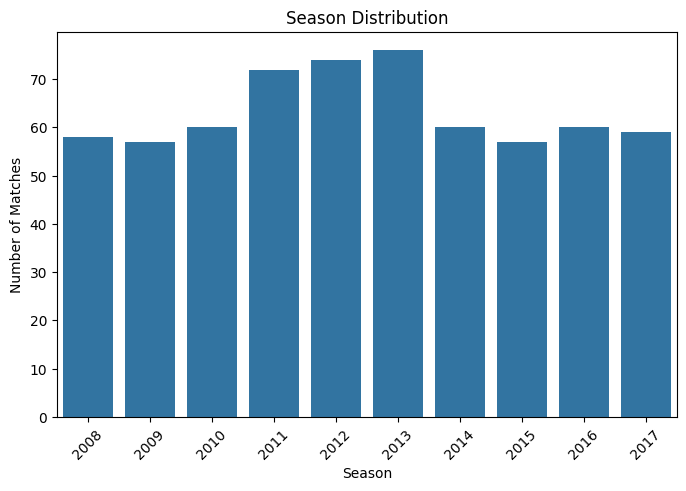

In [20]:
# Season Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='season', data=df_matches)
plt.title('Season Distribution')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

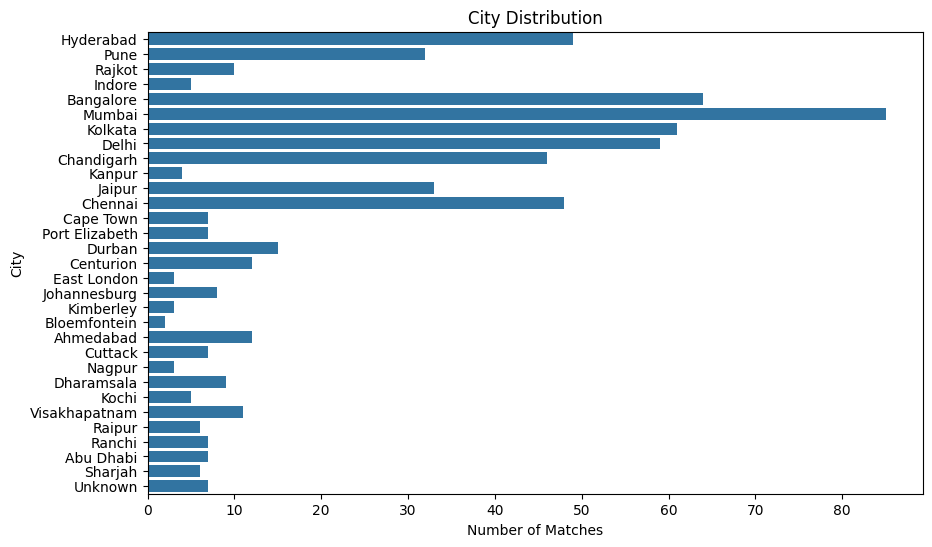

In [21]:
# City Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='city', data=df_matches)
plt.title('City Distribution')
plt.xlabel('Number of Matches')
plt.ylabel('City')
plt.show()

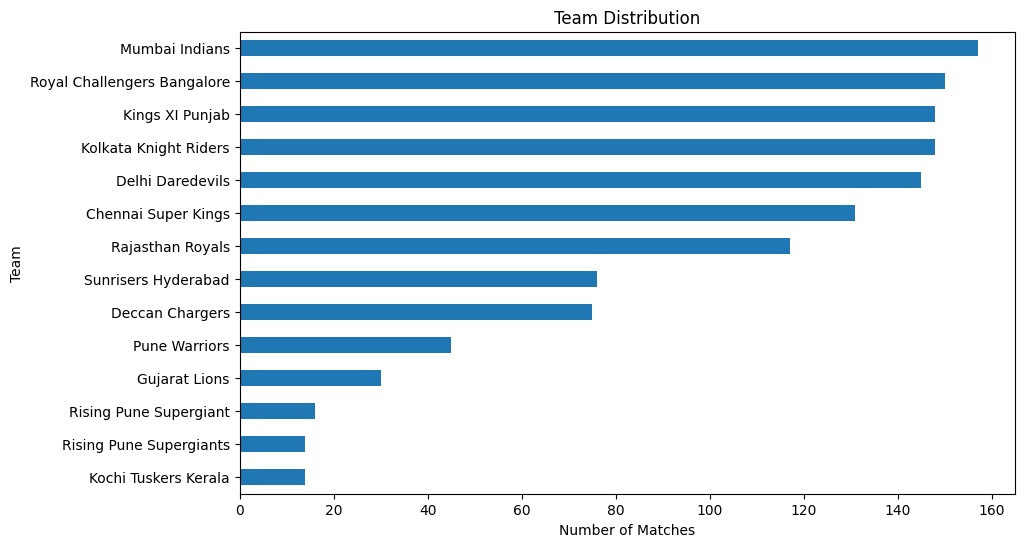

In [22]:
plt.figure(figsize=(10, 6))
team_counts = pd.concat([df_matches['team1'], df_matches['team2']]).value_counts().sort_values()
team_counts.plot(kind='barh')
plt.title('Team Distribution')
plt.xlabel('Number of Matches')
plt.ylabel('Team')
plt.show()

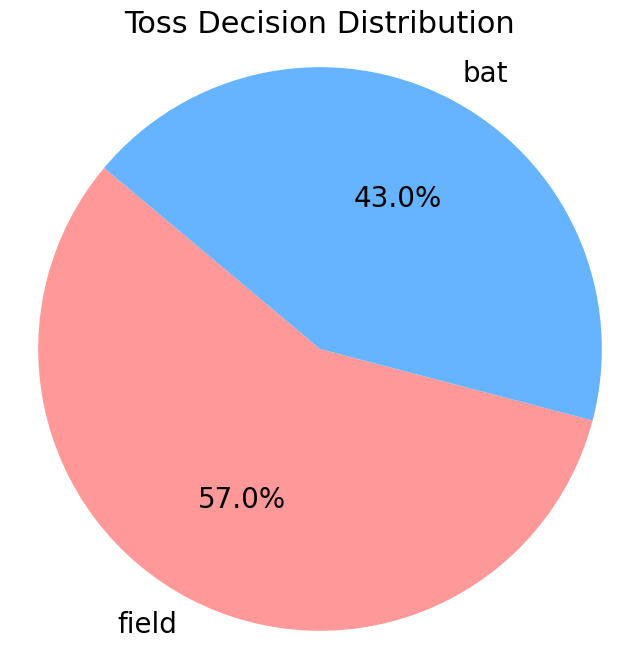

In [23]:
plt.figure(figsize=(8, 8))
toss_decision_counts = df_matches['toss_decision'].value_counts()
labels = toss_decision_counts.index
plt.pie(toss_decision_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'],textprops={'fontsize':20})
plt.title('Toss Decision Distribution',fontdict={"fontsize":22})
plt.axis('equal')
plt.show()

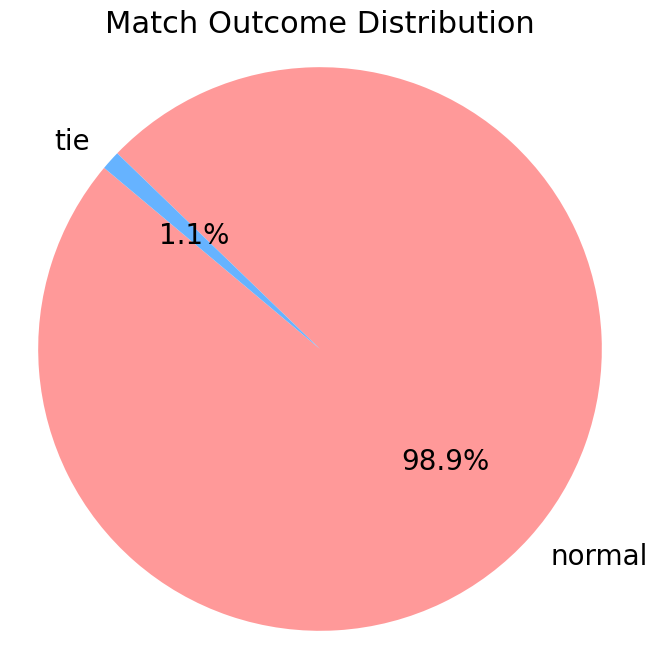

In [24]:
plt.figure(figsize=(8, 8))
match_outcome_counts = df_matches['result'].value_counts()
labels = match_outcome_counts.index
plt.pie(match_outcome_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'],textprops={'fontsize':20})
plt.title('Match Outcome Distribution',fontdict={"fontsize":22})
plt.axis('equal')
plt.show()

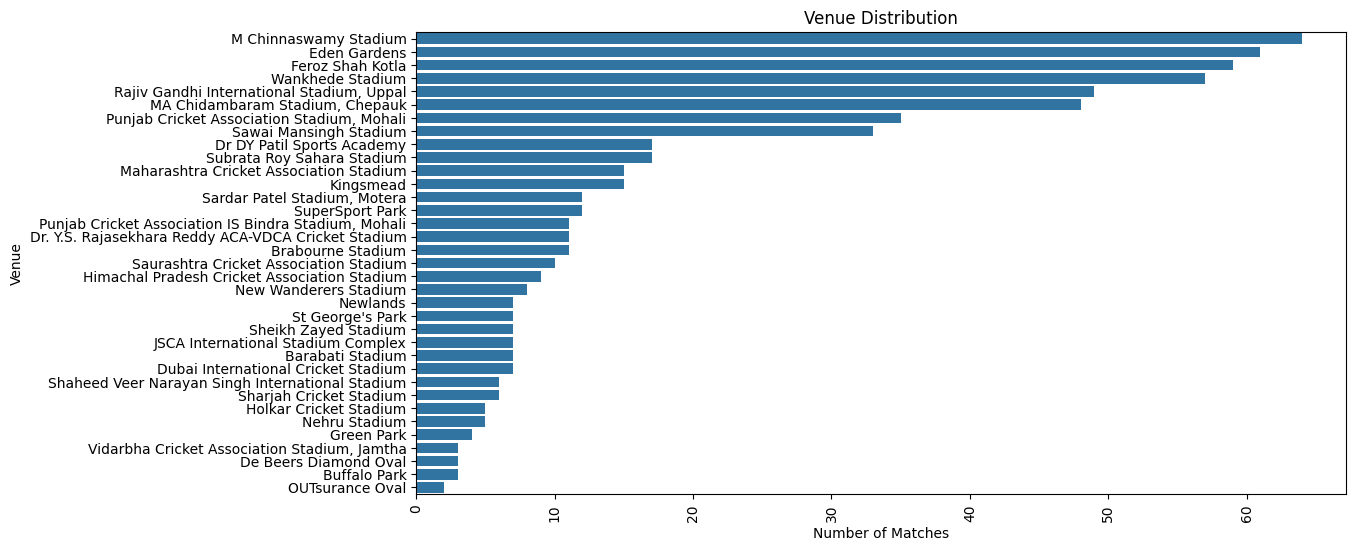

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(y='venue', data=df_matches, order=df_matches['venue'].value_counts().index)
plt.title('Venue Distribution')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.xticks(rotation=90)
plt.show()

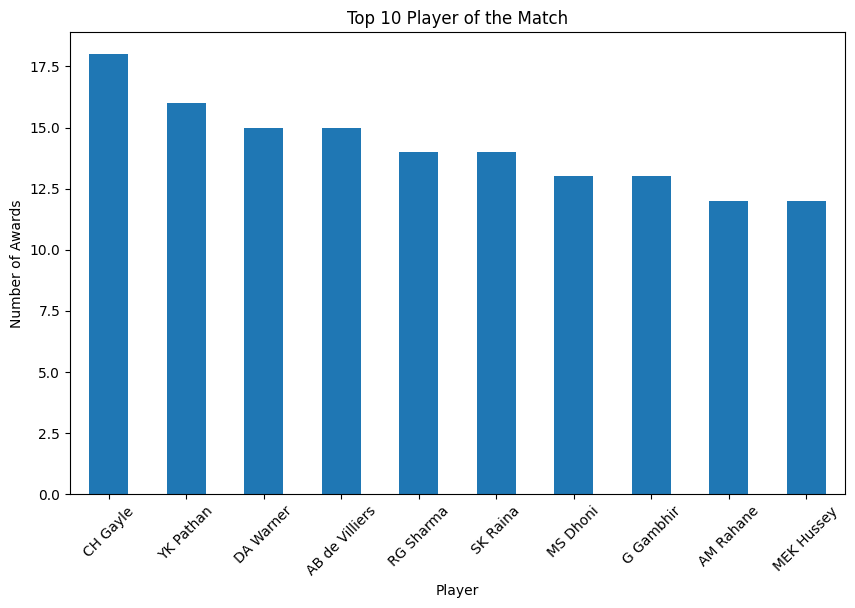

In [26]:
plt.figure(figsize=(10, 6))
df_matches['player_of_match'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Player of the Match')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45)
plt.show()

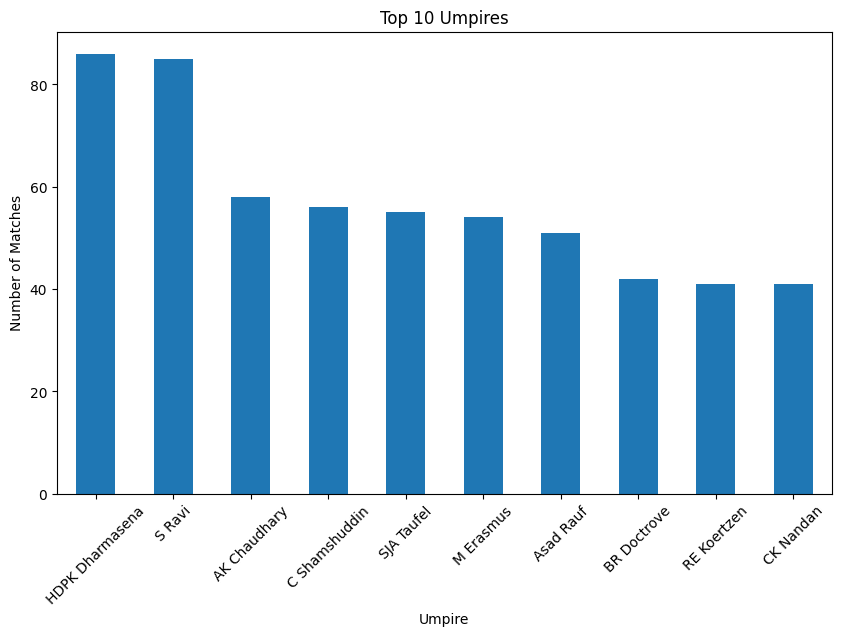

In [27]:
plt.figure(figsize=(10, 6))
umpires = pd.concat([df_matches['umpire1'], df_matches['umpire2']]).value_counts().head(10)
umpires.plot(kind='bar')
plt.title('Top 10 Umpires')
plt.xlabel('Umpire')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

## Bivariate Analysis

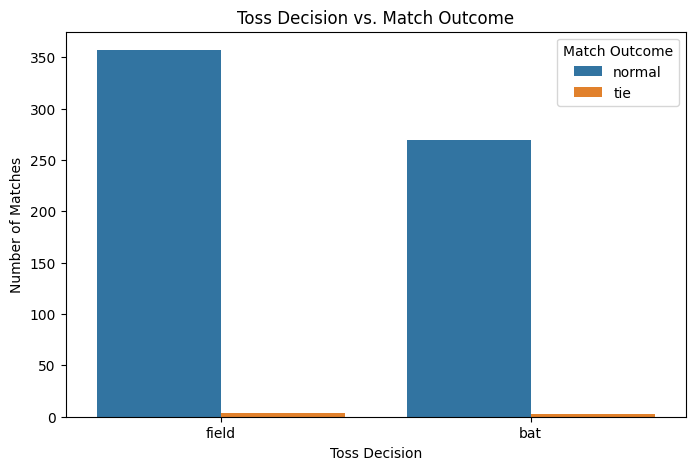

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x='toss_decision', hue='result', data=df_matches)
plt.title('Toss Decision vs. Match Outcome')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.show()

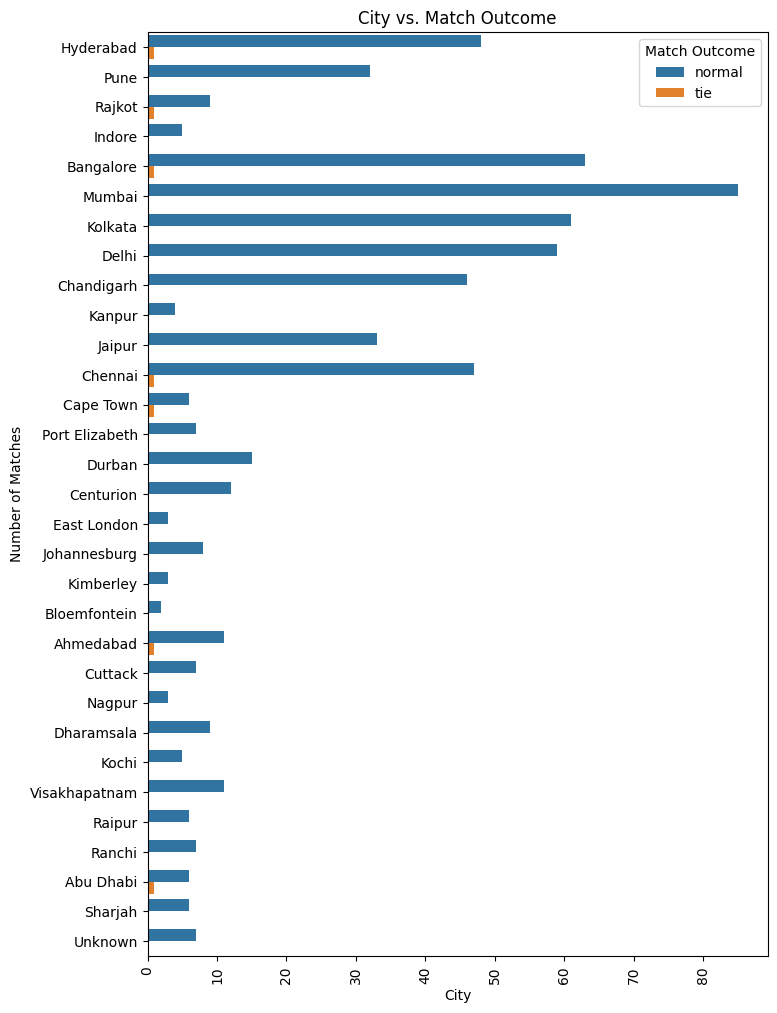

In [29]:
plt.figure(figsize=(8, 12))
sns.countplot(y='city', hue='result', data=df_matches)
plt.title('City vs. Match Outcome')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.legend(title='Match Outcome')
plt.show()

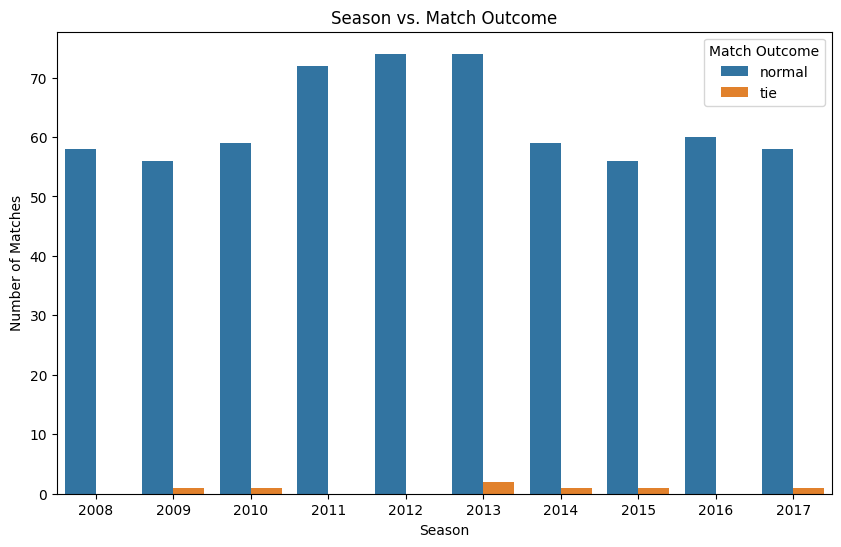

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='season', hue='result', data=df_matches)
plt.title('Season vs. Match Outcome')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.show()

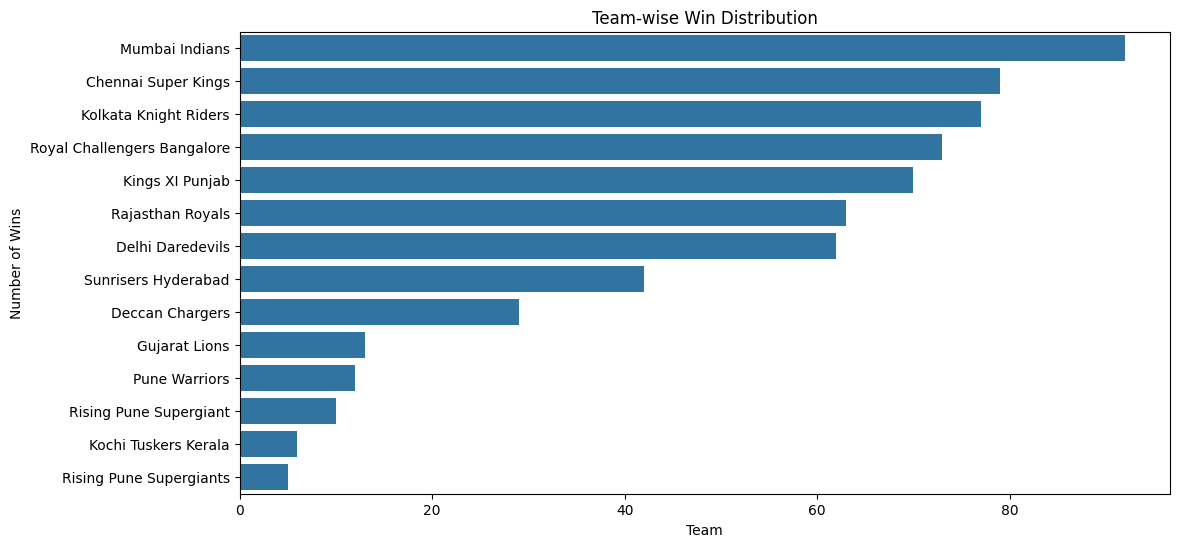

In [31]:
plt.figure(figsize=(12, 6))
win_counts = df_matches['winner'].value_counts()
sns.barplot(x=win_counts.values, y=win_counts.index)
plt.title('Team-wise Win Distribution')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.show()

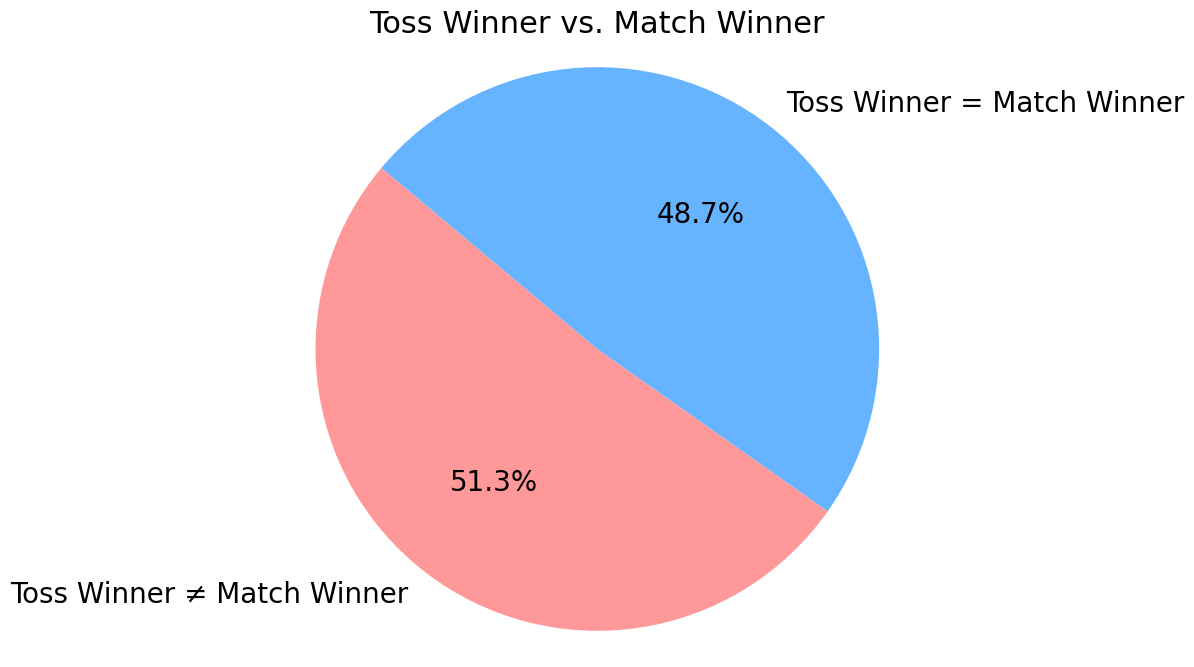

In [32]:
plt.figure(figsize=(8, 8))
df_matches['toss_winner_match_winner'] = df_matches['toss_winner'] == df_matches['winner']
match_winner_counts = df_matches['toss_winner_match_winner'].value_counts()
labels = ['Toss Winner ≠ Match Winner', 'Toss Winner = Match Winner']
plt.pie(match_winner_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'],textprops={'fontsize':20})
plt.title('Toss Winner vs. Match Winner',fontdict={"fontsize":22})
plt.axis('equal')
plt.show()

## **deliveries.csv**

## Basic Data Exploration

In [33]:
df_deliveries.shape

(150460, 22)

In [34]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        150460 non-null  int64 
 1   match_id          150460 non-null  int64 
 2   inning            150460 non-null  int64 
 3   batting_team      150460 non-null  object
 4   bowling_team      150460 non-null  object
 5   over              150460 non-null  int64 
 6   ball              150460 non-null  int64 
 7   batsman           150460 non-null  object
 8   non_striker       150460 non-null  object
 9   bowler            150460 non-null  object
 10  is_super_over     150460 non-null  int64 
 11  wide_runs         150460 non-null  int64 
 12  bye_runs          150460 non-null  int64 
 13  legbye_runs       150460 non-null  int64 
 14  noball_runs       150460 non-null  int64 
 15  penalty_runs      150460 non-null  int64 
 16  batsman_runs      150460 non-null  int

## Data Cleaning

In [35]:
df_deliveries.drop(columns=["Unnamed: 0"],inplace=True)

In [36]:
df_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [37]:
df_deliveries.fillna({"player_dismissed": "Not Dismissed", "dismissal_kind": "Not Dismissed", "fielder": "No Fielder"}, inplace=True)

In [38]:
df_deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [39]:
df_deliveries["batting_team"] = df_deliveries["batting_team"].str.replace("Rising Pune Supergiant","Rising Pune Supergiants")
df_deliveries["batting_team"] = df_deliveries["batting_team"].str.replace("Rising Pune Supergiantss","Rising Pune Supergiants")
df_deliveries["bowling_team"] = df_deliveries["bowling_team"].str.replace("Rising Pune Supergiant","Rising Pune Supergiants")
df_deliveries["bowling_team"] = df_deliveries["bowling_team"].str.replace("Rising Pune Supergiantss","Rising Pune Supergiants")

## Univariate Analysis

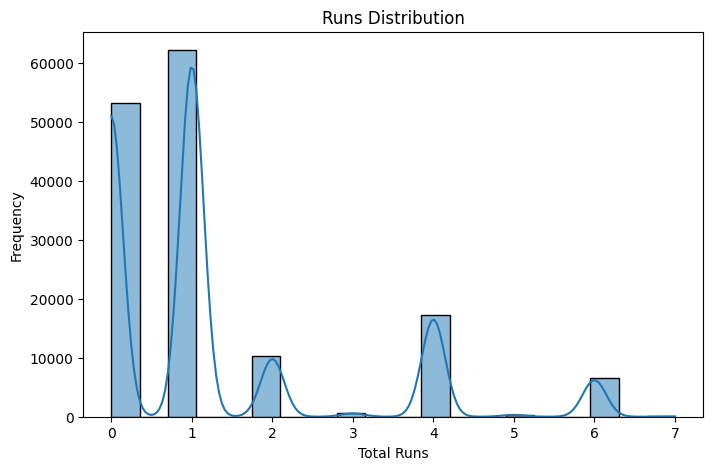

In [40]:
plt.figure(figsize=(8, 5))
sns.histplot(df_deliveries['total_runs'], bins=20, kde=True)
plt.title('Runs Distribution')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()

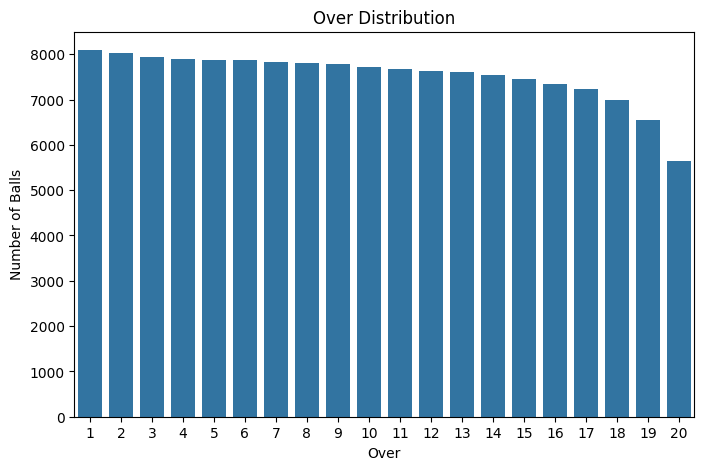

In [41]:
plt.figure(figsize=(8, 5))
sns.countplot(x='over', data=df_deliveries)
plt.title('Over Distribution')
plt.xlabel('Over')
plt.ylabel('Number of Balls')
plt.show()

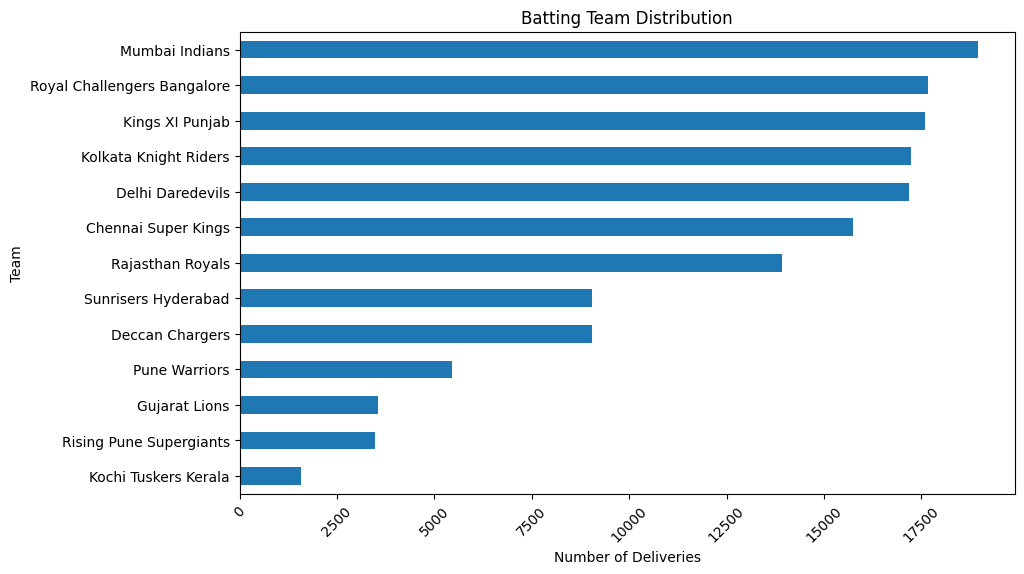

In [42]:
plt.figure(figsize=(10, 6))
df_deliveries['batting_team'].value_counts().sort_values().plot(kind='barh')
plt.title('Batting Team Distribution')
plt.ylabel('Team')
plt.xlabel('Number of Deliveries')
plt.xticks(rotation=45)
plt.show()

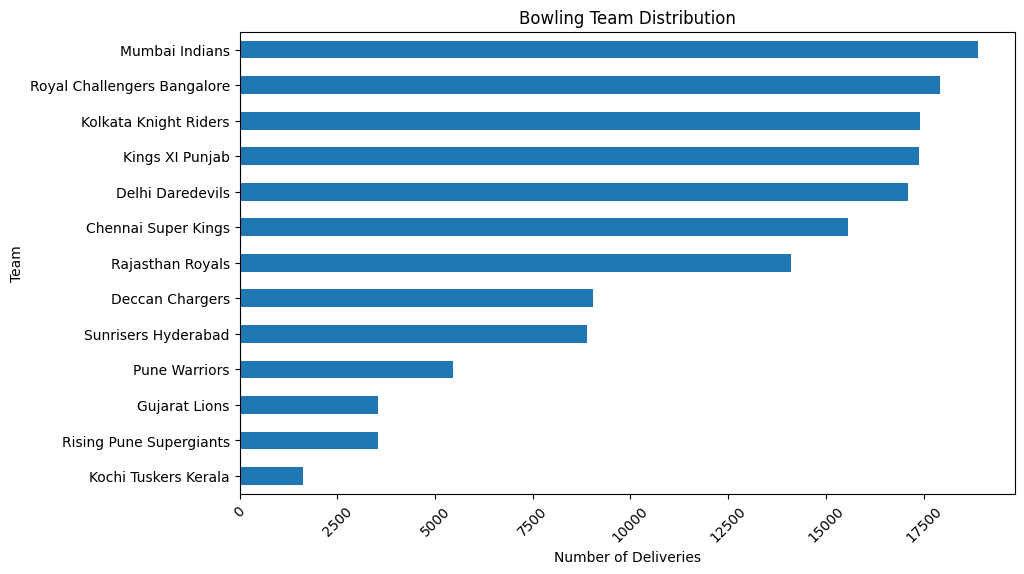

In [43]:
plt.figure(figsize=(10, 6))
teams_df = df_deliveries[df_deliveries['bowling_team'] != 'Kings']
teams_df['bowling_team'].value_counts().sort_values().plot(kind='barh')
plt.title('Bowling Team Distribution')
plt.ylabel('Team')
plt.xlabel('Number of Deliveries')
plt.xticks(rotation=45)
plt.show()

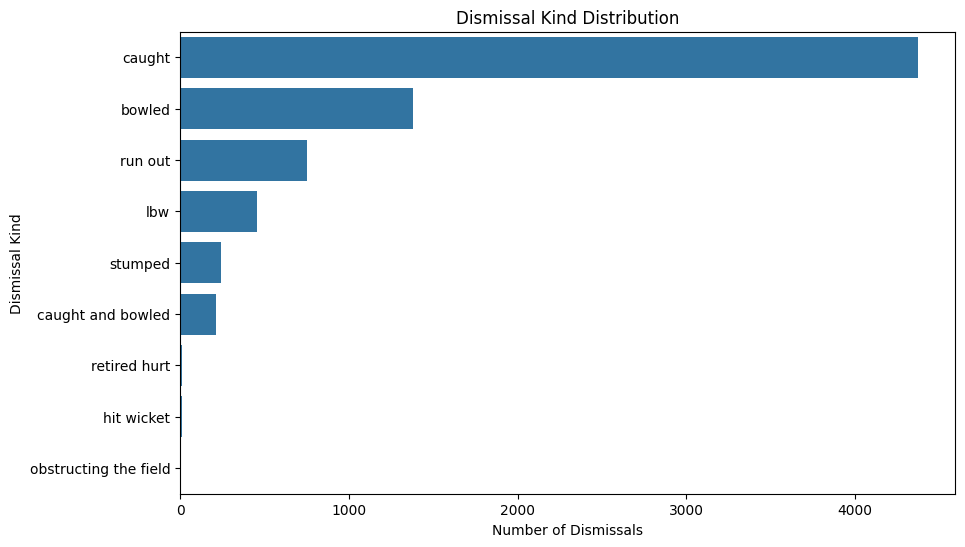

In [44]:
plt.figure(figsize=(10, 6))
wickets_df = df_deliveries[df_deliveries['player_dismissed'] != 'Not Dismissed']
sns.countplot(y='dismissal_kind', data=wickets_df, order=wickets_df['dismissal_kind'].value_counts().index)
plt.title('Dismissal Kind Distribution')
plt.xlabel('Number of Dismissals')
plt.ylabel('Dismissal Kind')
plt.show()

## Bivariate Analysis

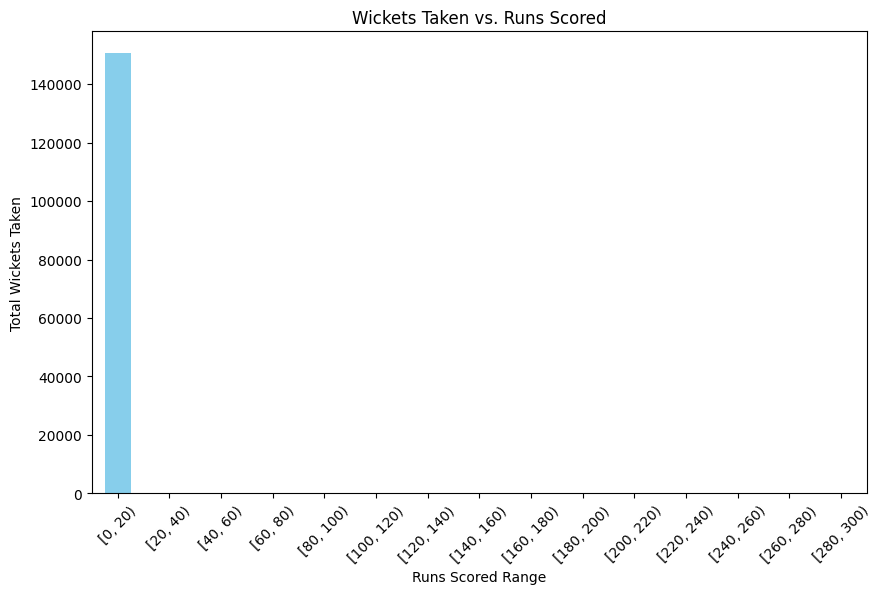

In [45]:
# Define bins for runs scored
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]

# Create a new column for bins
df_deliveries['runs_bins'] = pd.cut(df_deliveries['total_runs'], bins=bins, right=False)

# Group by runs bins and count wickets taken
wickets_by_runs = df_deliveries.groupby('runs_bins')['player_dismissed'].count()

# Plot Bar Plot
plt.figure(figsize=(10, 6))
wickets_by_runs.plot(kind='bar', color='skyblue')
plt.title('Wickets Taken vs. Runs Scored')
plt.xlabel('Runs Scored Range')
plt.ylabel('Total Wickets Taken')
plt.xticks(rotation=45)
plt.show()


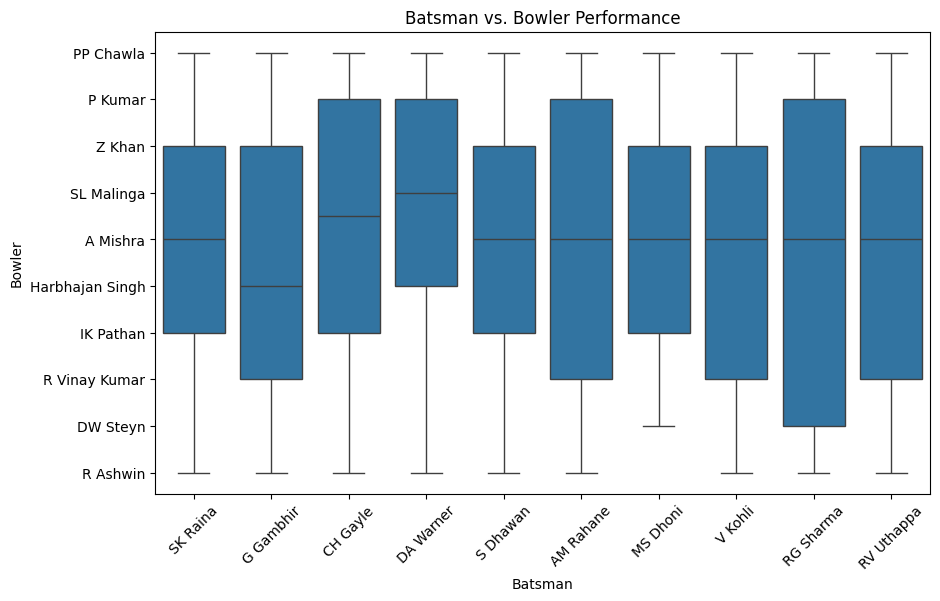

In [46]:
plt.figure(figsize=(10, 6))
top_batsmen = df_deliveries['batsman'].value_counts().head(10).index
top_bowlers = df_deliveries['bowler'].value_counts().head(10).index
batsman_bowler_performance = df_deliveries[df_deliveries['batsman'].isin(top_batsmen) & df_deliveries['bowler'].isin(top_bowlers)]
sns.boxplot(x='batsman', y='bowler', data=batsman_bowler_performance)
plt.title('Batsman vs. Bowler Performance')
plt.xlabel('Batsman')
plt.ylabel('Bowler')
plt.xticks(rotation=45)
plt.show()

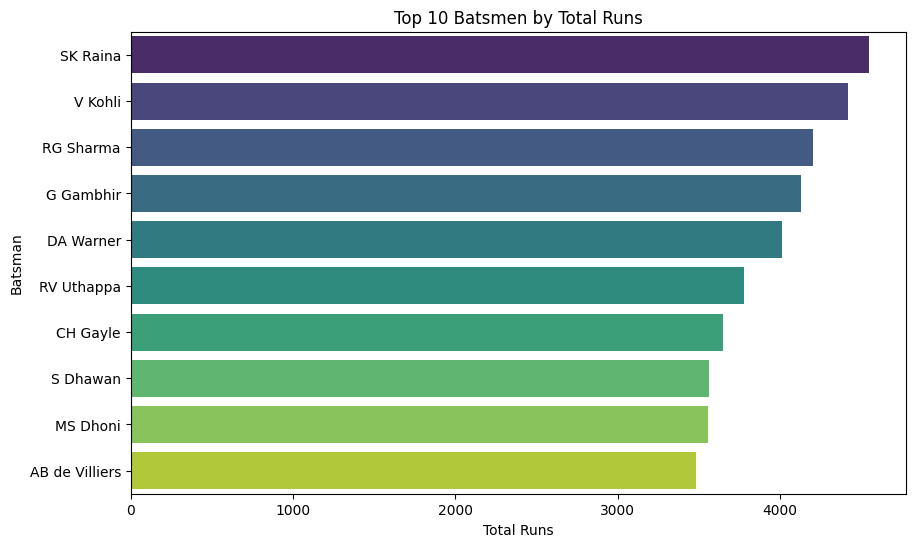

In [47]:
plt.figure(figsize=(10, 6))
batsman_total_runs = df_deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=batsman_total_runs.values, y=batsman_total_runs.index, palette='viridis')
plt.title('Top 10 Batsmen by Total Runs')
plt.ylabel('Batsman')
plt.xlabel('Total Runs')
plt.show()

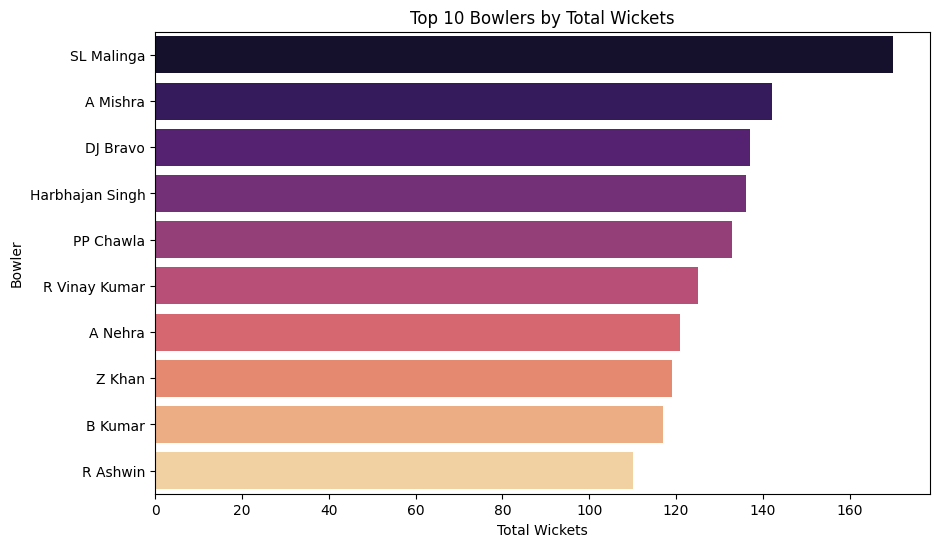

In [48]:
plt.figure(figsize=(10, 6))
bowler_total_wickets = df_deliveries[df_deliveries['dismissal_kind'] != 'Not Dismissed']['bowler'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=bowler_total_wickets.values, y=bowler_total_wickets.index, palette='magma')
plt.title('Top 10 Bowlers by Total Wickets')
plt.ylabel('Bowler')
plt.xlabel('Total Wickets')
plt.show()

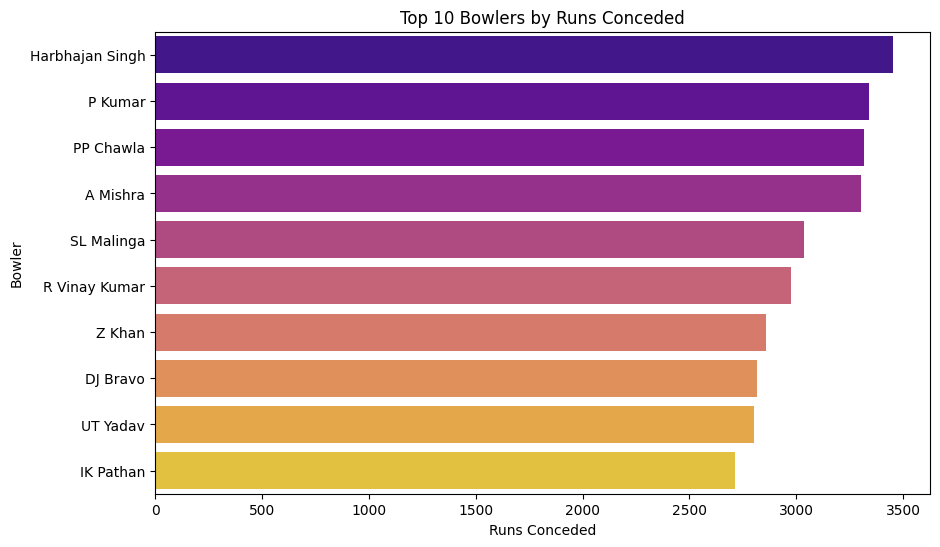

In [49]:
plt.figure(figsize=(10, 6))
bowler_runs_conceded = df_deliveries.groupby('bowler')['total_runs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=bowler_runs_conceded.values, y=bowler_runs_conceded.index, palette='plasma')
plt.title('Top 10 Bowlers by Runs Conceded')
plt.ylabel('Bowler')
plt.xlabel('Runs Conceded')
plt.show()

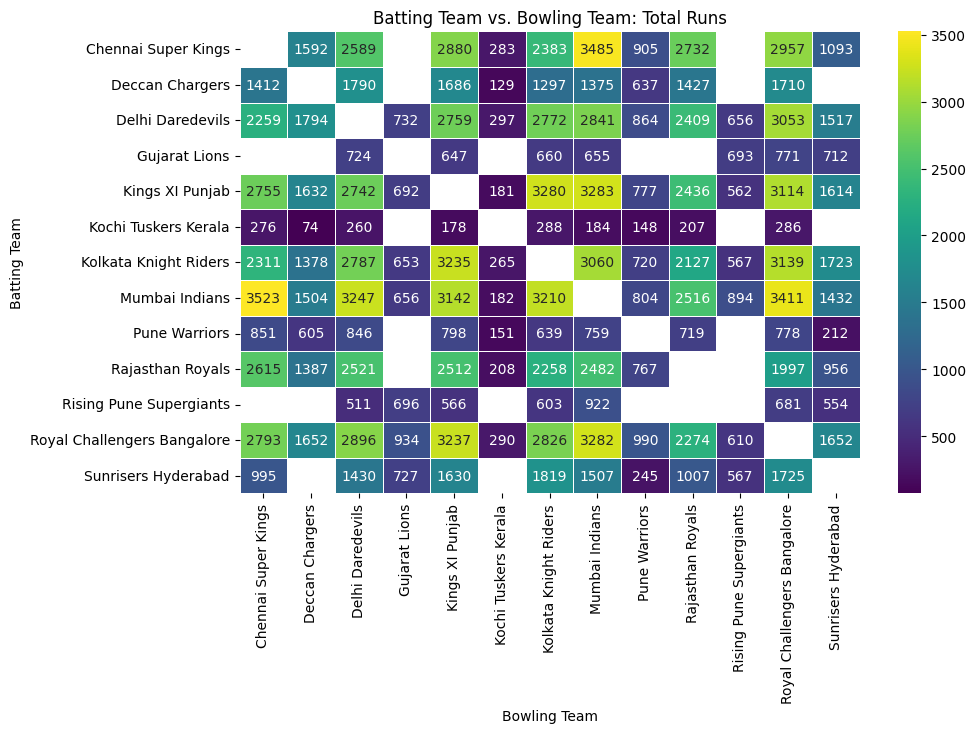

In [50]:
plt.figure(figsize=(10, 6))
batting_team_vs_bowling_team = df_deliveries.groupby(['batting_team', 'bowling_team'])['total_runs'].sum().unstack()
sns.heatmap(batting_team_vs_bowling_team, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Batting Team vs. Bowling Team: Total Runs')
plt.xlabel('Bowling Team')
plt.ylabel('Batting Team')
plt.show()